In [1202]:
# import test_tensor_2d as tt ttbd
import quimb.tensor as qtn
import quimb as qu
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
import itertools
import spinlessQubit as sq
import hubbardJWT as han

In [132]:
reload(sq)
sql = sq.SpinlessQubitLattice()
sql.t_make_stabilizers()

1-----2
|     |
4-----5
None None 6 None


In [1221]:
reload(sq)
reload(han)

##Testing params
T_PARAM=1
V_PARAM=0.4
MU_PARAM=2
LX, LY = 2, 3


### Analytical Hubbard Hamiltonian
hub = han.FermiHubbardSpinless(Lx=LX, Ly=LY)
hub.build_spinless_ham(t=T_PARAM, V=V_PARAM, mu=MU_PARAM)
Hexact = hub._Ham.copy()
gex, gsx = qu.eigh(Hexact)
print('Exact:  {}'.format(gex[0]))

nx = hub.state_occs(state=gsx[:,0])
print(nx,end='\n\n')


### Qubit lattice Hamiltonian
sql = sq.SpinlessQubitLattice(Lx=LX,Ly=LY)
sql.make_simulator_ham(t=T_PARAM, V=V_PARAM, mu=MU_PARAM)
sql.make_stabilizer()

rotHam = sql.projected_ham_3() 
Uplus = sql._Uplus
rens, reigst = qu.eigh(rotHam)
print(rens[0])

print(sql.state_local_occs(k=None, qstate=Uplus@reigst[:,0]))

Exact:  -10.628285685708567
[[0.8925035 0.714993  0.8925035]
 [0.8925035 0.714993  0.8925035]]

Stabilizer:
1-----2
|     |
4-----5
None None 6 None

-10.628285685708569
[[0.8925035 0.714993  0.8925035]
 [0.8925035 0.714993  0.8925035]]


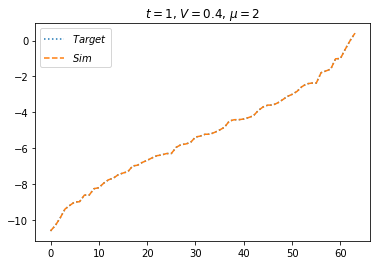

In [1217]:
plt.plot(gex, ':', label=r'$Target$') #exact Hubbard energies
# plt.plot(newpvals, '--',label=r'$Sim$')
plt.plot(rens, '--',label=r'$Sim$')

plt.title(r'$t={}$, $V={}$, $\mu={}$'.format(T_PARAM,V_PARAM,MU_PARAM))
plt.legend()


In [1034]:
for k in range(64):
    A = hub.state_occs(qu.basis_vec(i=k, dim=64))
    B = sql.state_local_occs(state=Uplus[:,k])
    assert np.allclose(A,B)
    # print(A,end='\n\n')
    # print(B,end='\n\n...\n\n')
wh=2    
# print(hub.stateOccs(Hexact@qu.basis_vec(i=2, dim=64)))
print(hub.state_occs(Hexact[:,2]))
print(sql.state_local_occs(state=Uplus@rotHam[:,2], faces=0))
# Hexact[:,2]
sql.faceX(Uplus@rotHam[:,2])

[[0. 1. 0.]
 [0. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 0.]]


-0.9999999999999996

In [1064]:
for k in [10]:
    vi = qu.basis_vec(i=k, dim=64)
    print(hub.state_occs(vi))
    # print(hub.parity(vi), end='\n\n')

vvi = vi.reshape(2,2,2,2,2,2)
vvi.nonzero()

[[0. 0. 1.]
 [0. 1. 0.]]


(array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64))

In [1188]:
qu.prod([2,2])

4

In [1201]:
dims = [2]*2
D = qu.prod(dims)

inds = [0,1]
X, Y, Z = (qu.pauli(mu) for mu in ['x','y','z'])

XY = qu.pkron(op=X&Y, dims=dims, inds=inds)
YX = qu.pkron(op=Y&X, dims=dims, inds=inds)

ex = qu.eigh(X)[1].copy()
ey = qu.eigh(Y)[1].copy()

Uxy = qu.pkron(op=ex&ey, dims=dims, inds=inds)
Uyx = qu.pkron(op=ey&ex, dims=dims, inds=inds)

Qxy = (Uxy.H @ XY @ Uxy).real.round(2)
UxyPlus = Uxy[:,np.where(np.diag(Qxy)==1.0)[0]]
assert np.allclose((UxyPlus.H @ XY @ UxyPlus), np.diag([1.0]*int(D/2)))
qu.eigh(Uxy.H @ YX @ Uxy)[1].round(2)






[[-0.71-0.j  0.  +0.j  0.  +0.j -0.71+0.j]
 [ 0.  +0.j  0.71+0.j  0.71+0.j  0.  +0.j]
 [ 0.  +0.j -0.71+0.j  0.71+0.j  0.  +0.j]
 [-0.71+0.j  0.  +0.j  0.  +0.j  0.71+0.j]]